# <b>Analysis</b>
Prior to processing the data, a brief analysis is conducted to get a better understanding of the data that we are working with. This analysis allows us to assess the quality of the data (bad - average - good) and ultimately determine how the subsequent steps in the processing should be shaped

## Load necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load in raw data

### Company based products and services
This data contains the products and services derived from the scraped companies data originating from Austria, France, Germany, Netherlands, and Spain

In [7]:
# Determine the location of the dataframe containing the company based products and services
company_based_p_and_s_location = "../data/example_data/output/base_data/products_and_services_processed.csv"

# Read the dataframe
company_based_p_and_s  = pd.read_csv(company_based_p_and_s_location)

# Display dataframe
display(company_based_p_and_s)

,products_id,products_and_services
0,d379f2ced32e7806893e4232fdbd0f9544146ae8,steels and metals - forming and cutting
1,20d8631bd54d2c718a32a8cf80bc910b0eab0648,steels and metals - machining
2,6b91c2ca1f831dcafcc4c2a889b52f7e43d7e8d0,steels and metals - surface treatment and coating
3,60f41e1221ace9420db85d4107fab3109a1eba58,"hand tools, non-power"
4,3437f6e23dd6dd939e30657a2aeffd8e2f89d7e9,portable power tools
...,...,...
31897,105a7acab4c5bf9f08cef379da90cb16125bafdf,flue-gas desulfurization systems
31898,b7ba73350079156ebcce1da98aaf767ccb0cd16c,chopping boards
31899,fe02d46dae88e57a097b3735b874e13d917e4a8e,logistics transports
31900,4d221a2a9a7a78ff0a104bdc3fbf9352c4ff4a55,natural gypsum plaster


### EuroPages products and services catalogue
This data contains the products and services directly scraped from the EP activities catalogue

In [8]:
# Determine the location of the dataframe containing the company based products and services
europages_activities_catalogue_location = "../data/example_data/input/scraped_EP_products_catalogue.csv"

# Read the dataframe
europages_activities_catalogue  = pd.read_csv(europages_activities_catalogue_location)

# Display dataframe
display(europages_activities_catalogue)

,products_and_services,products_id,ID
0,a0 size photocopy,d767925b2b31998720be47150c317b8b,1
1,a4 self-adhesive sheets,8b14539d24b4e721f7b0a2f4355e2698,2
2,abamectin,3f9bdd95cac6914274f80462954d0c04,3
3,abattoir with agreed store,e4ddbcf93fb7a754239358b82e0892de,4
4,abattoirs,0c43e8a2b18ffba9573fd91343865dca,5
...,...,...,...
42449,zootechnical feed,31038b5276adc87194b0f647ae36abf8,42450
42450,zootechnical foods,5306a7f02167e79365c7626ac48b4ff5,42451
42451,zootechnical integrators,62f4c57406cd9fb1190b67ea25cb48ce,42452
42452,zootechnics - equipment,3d86fe5ed83d4c4fe2304a311967a39e,42453


### new Italy Data

In [10]:
# Determine the location of the dataframe containing the new italy tilt data
italy_tilt_data_location = "../data/example_data/input/tilt_italy_products_and_services_unprocessed.csv"

# Read the dataframe
italy_tilt_data  = pd.read_csv(italy_tilt_data_location)

# Display dataframe
display(italy_tilt_data)

,products_and_services,products_id
0,organic farming,996c2256-502c-4821-bd87-b822405a10eb
1,crop services,c35b0904-4747-4038-a0c7-d391af1f944e
2,agriculture - machines & equipment,941c038a-3547-4985-835d-6c82a56090f8
3,agricultural systems and equipment,98d6e96c-3d4f-4d33-940e-3444d9f725c8
4,organic fertilizers,546529b7-9e7b-4b9e-92d7-0c532ef6260f
...,...,...
14572,decorative paints,d87ded84-6b5d-4ef1-9cd0-5b1f4ea26910
14573,"wall-coverings, fabric",9c4c22f5-6c84-402e-91d3-b317896e8650
14574,"wall-coverings, fabric",a3664d9f-c777-4193-8707-417b633d9a4e
14575,carpet,f78e7f1a-8fe1-4346-b487-a54d9fa94a38


## Conducting analysis

### Analysis helper functions

In [11]:
def run_analysis(dataframe):
    # determine the number of rows containing missing values
    nan_rows = dataframe.isna().any(axis=1)
    print("There are {} products with a missing products information".format(nan_rows.sum()))
    # see if there are duplicate products
    sentences = dataframe["products_and_services"].tolist()
    unique_sentences = dataframe["products_and_services"].unique()
    print('There are {} unique products'.format(len(unique_sentences)))
    # generate a product word length distribution plot
    generate_plot(sentences)

def generate_plot(df_sentences):
    length_dict = dict()

    # get count for each sentence length
    for i in range(len(df_sentences)):
        length_dict[len(df_sentences[i].split())] = length_dict.get(len(df_sentences[i].split()), 0) + 1

    sns.set_style("whitegrid")
    
    # plot boxplot
    plot = sns.barplot(x=length_dict.keys(), y=length_dict.values())
    
    # add label to the axis and label to the plot
    _ = plot.set(xlabel ="Sentence length (word count)", ylabel = "Frequency", title ='Sentence Length Distribution')

In [12]:
def ep_catalogue_coverage(df_1, df_2):
    # Merge the two dataframes based on the 'products_and_services' column
    merged_df = df_1.merge(df_2, on='products_and_services', how='inner')

    # Calculate the percentage of overlap
    overlap_percentage = len(merged_df) / len(df_1) * 100

    # Print the percentage of overlap
    print(f"The EuroPages catalogue covers the dataset for {overlap_percentage:.2f}%")

### Individual level

#### Company based products and services

There are 0 products with a missing products information
There are 31902 unique products


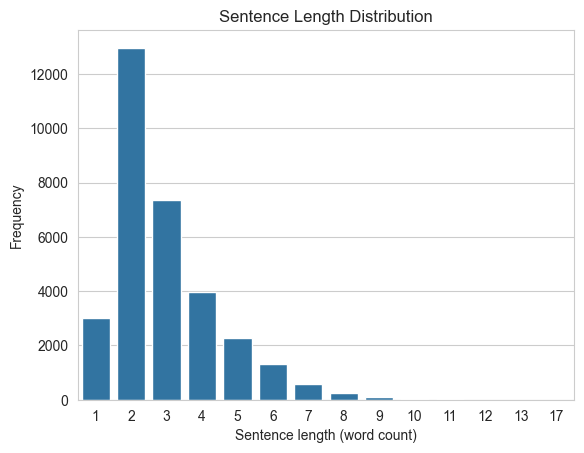

In [13]:
run_analysis(company_based_p_and_s)

#### EuroPages products and services catalogue

There are 0 products with a missing products information
There are 42454 unique products


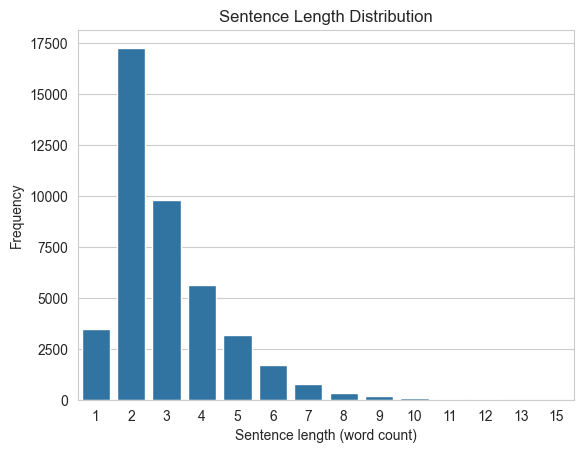

In [14]:
run_analysis(europages_activities_catalogue)

#### new Italy Data

There are 0 products with a missing products information
There are 14577 unique products


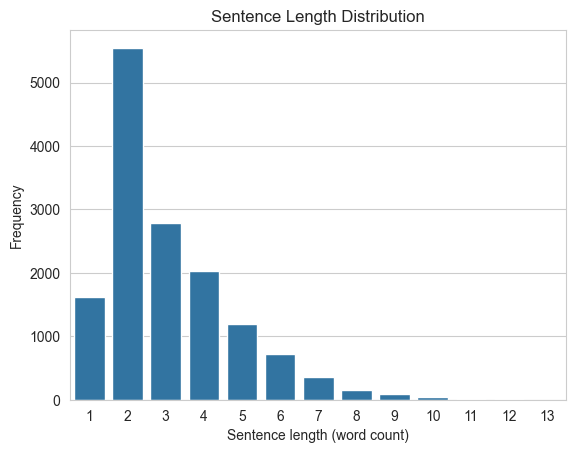

In [15]:
run_analysis(italy_tilt_data)

### In-between level

#### Company based vs EuroPages

In [18]:
ep_catalogue_coverage(company_based_p_and_s, europages_activities_catalogue)

The EuroPages catalogue covers the dataset for 55.21%


#### new Italy Data vs EuroPages

In [21]:
ep_catalogue_coverage(italy_tilt_data, europages_activities_catalogue)

The EuroPages catalogue covers the dataset for 2.59%
